In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import datetime


In [120]:
df=pd.read_csv("D:\python\RAIN.NS.csv",parse_dates=["Date"])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-09-02,2.73,2.73,2.48,2.52,1.027516,19255.0
1,2002-09-03,2.51,2.58,2.46,2.46,1.003052,11850.0
2,2002-09-04,2.55,2.55,2.42,2.44,0.994897,17250.0
3,2002-09-05,2.40,2.51,2.40,2.46,1.003052,6500.0
4,2002-09-06,2.53,2.62,2.43,2.50,1.019361,30395.0


In [121]:
df.info()  #checking the datatype of each col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4734 non-null   datetime64[ns]
 1   Open       4716 non-null   float64       
 2   High       4716 non-null   float64       
 3   Low        4716 non-null   float64       
 4   Close      4716 non-null   float64       
 5   Adj Close  4716 non-null   float64       
 6   Volume     4716 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 259.0 KB


In [122]:
df.isnull().sum()

Date          0
Open         18
High         18
Low          18
Close        18
Adj Close    18
Volume       18
dtype: int64

In [123]:
df.drop([ "Open","High","Low", "Adj Close","Volume"],axis=1,inplace=True)

In [124]:
df.head()

,Date,Close
0,2002-09-02,2.52
1,2002-09-03,2.46
2,2002-09-04,2.44
3,2002-09-05,2.46
4,2002-09-06,2.50


In [125]:
df.isnull().sum()

Date      0
Close    18
dtype: int64

In [126]:
df_mean=df.fillna(df["Close"].mean())


In [127]:
df_mean.isnull().sum()

Date     0
Close    0
dtype: int64

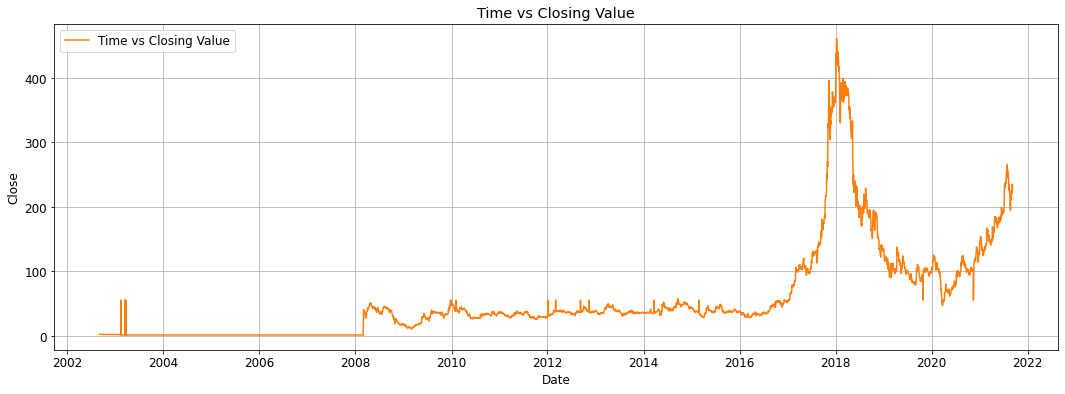

In [128]:
plt.rc('font', size=12)                       
fig, ax = plt.subplots(figsize=(18, 6))                                     
ax.plot(df_mean["Date"], df_mean["Close"], color='tab:orange', label='Time vs Closing Value')         #plotting code                   
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.set_title('Time vs Closing Value')
ax.grid(True)
ax.legend(loc='upper left');


In [129]:
df_mean['Date']=df_mean['Date'].map(datetime.datetime.toordinal)    #converting data to ordinal rank system
print(df_mean['Date'])


0       731095
1       731096
2       731097
3       731098
4       731099
         ...  
4729    738035
4730    738036
4731    738039
4732    738040
4733    738041
Name: Date, Length: 4734, dtype: int64


In [130]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4734 non-null   int64  
 1   Close   4734 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 74.1 KB


Mean1 = 14.252491144751053 
 Mean2 = 96.72688115083844 

Variance1 = 259.5364073823085 
 Variance2 = 7315.990649364341 





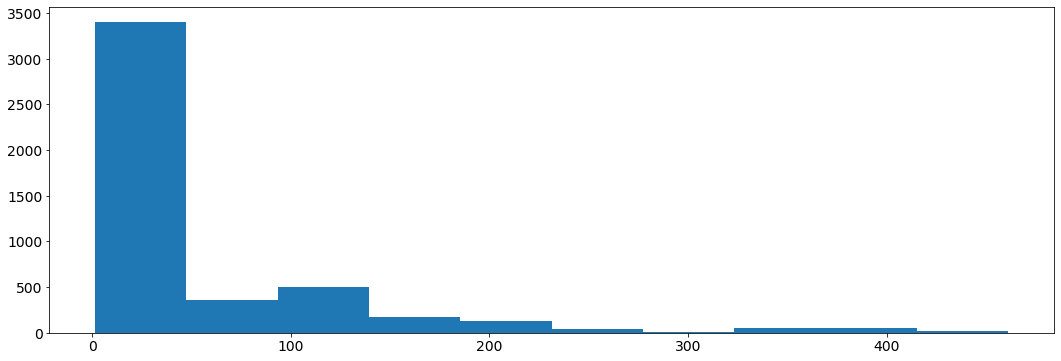

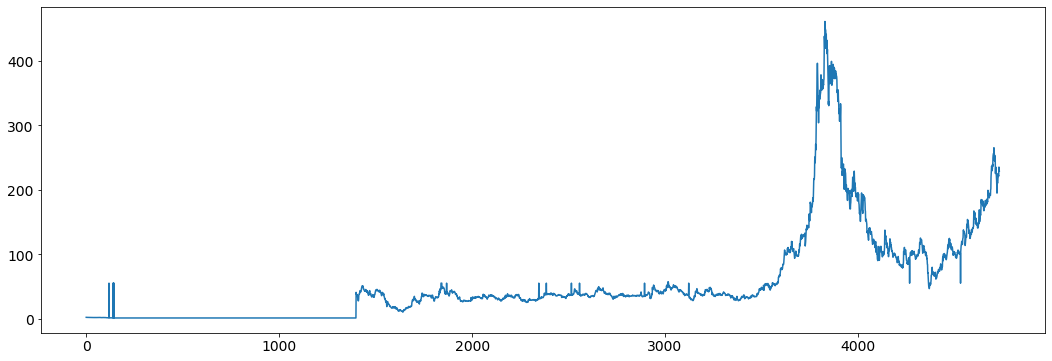

In [131]:
#to check data is stationary or not

X = df_mean["Close"]
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print(f"Mean1 = {mean1} \n Mean2 = {mean2} \n")
print(f"Variance1 = {var1} \n Variance2 = {var2} \n\n\n")
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(18, 6))
ax.hist(X)
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X)


Mean1 = 1.6751630867392127 
 Mean2 = 4.280255450838027 

Variance1 = 2.2144400204241883 
 Variance2 = 0.524433941219644 





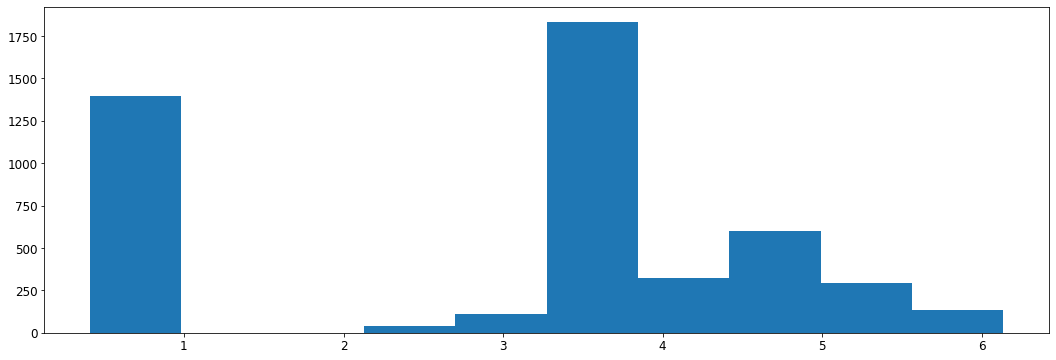

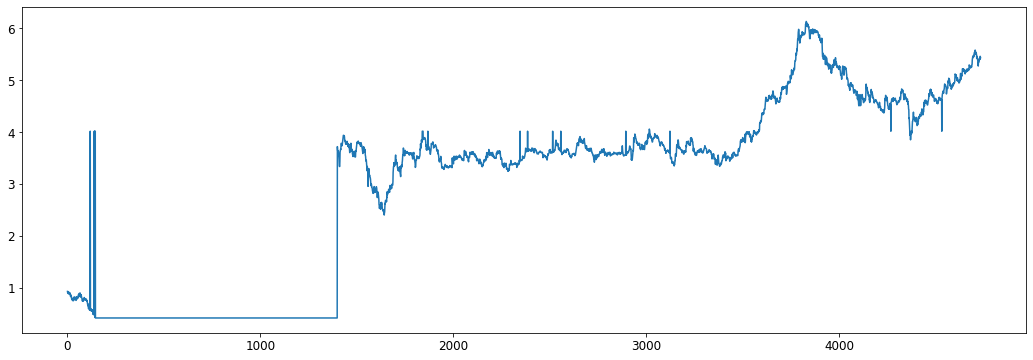

In [132]:
from numpy import log
X = df_mean["Close"]
X = log(X)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print(f"Mean1 = {mean1} \n Mean2 = {mean2} \n")
print(f"Variance1 = {var1} \n Variance2 = {var2} \n\n\n")
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(18, 6))
ax.hist(X)
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X)


In [133]:
df_mean['Close'] = log(df_mean['Close']) #log transform applied to original data


In [134]:
df_mean['Close']

0       0.924259
1       0.900161
2       0.891998
3       0.900161
4       0.916291
          ...   
4729    5.404702
4730    5.402227
4731    5.461499
4732    5.445659
4733    5.434813
Name: Close, Length: 4734, dtype: float64

In [135]:
df_mean

,Date,Close
0,731095,0.924259
1,731096,0.900161
2,731097,0.891998
3,731098,0.900161
4,731099,0.916291
...,...,...
4729,738035,5.404702
4730,738036,5.402227
4731,738039,5.461499
4732,738040,5.445659


In [136]:
X = df_mean[['Date']] #Independent var # 1D to 2D
y = df_mean['Close'] #Dependent var
X.shape

(4734, 1)

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [138]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [139]:
lm.fit(X_train,y_train)



LinearRegression()

In [140]:
#Calculating the Alpha(Intercept) and Beta(Slope) value
alpha = lm.intercept_
beta = float(lm.coef_)
print(f"Aplha = {alpha} \n Beta = {beta} \n")
print(f"The equation is : y = {alpha} + {beta} X")


Aplha = -568.5993999575736 
 Beta = 0.0007781318424299195 

The equation is : y = -568.5993999575736 + 0.0007781318424299195 X


In [141]:
#The Closing Price(y) rises by 0.00077 when Day(X) is increased by one unit provided alpha value is zero.


In [142]:
#Prediction with Test Data (i.e. Cross Validation Data)
#Using .predict()

y_predicted = lm.predict(X_test)
print('Predictions:', y_predicted, sep='\n')


Predictions:
[5.12187626 1.36505572 0.4211818  ... 5.66034349 5.6237713  4.4752487 ]


In [143]:
#Using formula y = {alpha} + {beta} X
y_predicted1 = alpha + beta * X_test
print('predicted response:', y_predicted1, sep='\n')


predicted response:
          Date
4234  5.121876
971   1.365056
122   0.421182
2934  3.619304
2923  3.607632
...        ...
3691  4.494702
4656  5.607431
4703  5.660343
4671  5.623771
3674  4.475249

[1421 rows x 1 columns]


In [144]:
#Comparing y_test and y_predicted
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
df_comp


,Actual,Predicted
4234,4.396915,5.121876
971,0.412110,1.365056
122,0.565314,0.421182
2934,3.707456,3.619304
2923,3.461037,3.607632
...,...,...
3691,4.589041,4.494702
4656,5.155889,5.607431
4703,5.547518,5.660343
4671,5.206476,5.623771


In [145]:
from sklearn import metrics
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))


Mean Squared Error (MSE): 0.6109139115747421
Root Mean Squared Error (RMSE): 0.7816098205465065


In [146]:
r_sq = lm.score(X_train,y_train)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.8032750424630797


In [147]:
#Generating all the Working Days (i.e. Mon to Friday)
from datetime import date ,timedelta
working_days = [] #Empty list to store all working days
def daterange(date1, date2):
 for n in range(int ((date2 - date1).days)+1):
  yield date1 + timedelta(n)
start_dt = date(2023, 1, 1) #1st day of 2023
end_dt = date(2023, 12, 31) #last day of 2023
weekdays = [6,7] # 6 == Sat and 7 == Sunday
for dt in daterange(start_dt, end_dt):
 if dt.isoweekday() not in weekdays:
  print(dt.strftime("%d-%m-%Y"))
  working_days.append(dt.strftime("%d-%m-%Y"))


02-01-2023
03-01-2023
04-01-2023
05-01-2023
06-01-2023
09-01-2023
10-01-2023
11-01-2023
12-01-2023
13-01-2023
16-01-2023
17-01-2023
18-01-2023
19-01-2023
20-01-2023
23-01-2023
24-01-2023
25-01-2023
26-01-2023
27-01-2023
30-01-2023
31-01-2023
01-02-2023
02-02-2023
03-02-2023
06-02-2023
07-02-2023
08-02-2023
09-02-2023
10-02-2023
13-02-2023
14-02-2023
15-02-2023
16-02-2023
17-02-2023
20-02-2023
21-02-2023
22-02-2023
23-02-2023
24-02-2023
27-02-2023
28-02-2023
01-03-2023
02-03-2023
03-03-2023
06-03-2023
07-03-2023
08-03-2023
09-03-2023
10-03-2023
13-03-2023
14-03-2023
15-03-2023
16-03-2023
17-03-2023
20-03-2023
21-03-2023
22-03-2023
23-03-2023
24-03-2023
27-03-2023
28-03-2023
29-03-2023
30-03-2023
31-03-2023
03-04-2023
04-04-2023
05-04-2023
06-04-2023
07-04-2023
10-04-2023
11-04-2023
12-04-2023
13-04-2023
14-04-2023
17-04-2023
18-04-2023
19-04-2023
20-04-2023
21-04-2023
24-04-2023
25-04-2023
26-04-2023
27-04-2023
28-04-2023
01-05-2023
02-05-2023
03-05-2023
04-05-2023
05-05-2023
08-05-2023

In [148]:
#Creating a DataFrame by the "working_days" list
df_working_days = pd.DataFrame(working_days, columns=['WORKING_DAYS'])
print (df_working_days)


    WORKING_DAYS
0     02-01-2023
1     03-01-2023
2     04-01-2023
3     05-01-2023
4     06-01-2023
..           ...
255   25-12-2023
256   26-12-2023
257   27-12-2023
258   28-12-2023
259   29-12-2023

[260 rows x 1 columns]


In [149]:
df_working_days.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   WORKING_DAYS  260 non-null    object
dtypes: object(1)
memory usage: 2.2+ KB


In [150]:
# object converted to datetime64[ns]
df_working_days['WORKING_DAYS'] = pd.to_datetime(df_working_days['WORKING_DAYS'])


In [151]:
#Creating a backup for future use
df_2023_predictions = df_working_days.copy()


In [152]:
df_2023_predictions


,WORKING_DAYS
0,2023-02-01
1,2023-03-01
2,2023-04-01
3,2023-05-01
4,2023-06-01
...,...
255,2023-12-25
256,2023-12-26
257,2023-12-27
258,2023-12-28


In [153]:
# datetime64[ns] converted to ordinal
df_working_days['WORKING_DAYS']=df_working_days['WORKING_DAYS'].map(datetime.datetime.toordinal)
print(df_working_days['WORKING_DAYS'])


0      738552
1      738580
2      738611
3      738641
4      738672
        ...  
255    738879
256    738880
257    738881
258    738882
259    738883
Name: WORKING_DAYS, Length: 260, dtype: int64


In [154]:
#So finally we have all the ordinal values of working days of 2023
#Predicting the Closing Price for all the working days of 2023
X = df_working_days[['WORKING_DAYS']]
X.shape


(260, 1)

In [155]:
y_predicted = lm.predict(X)
print('Predictions of 2023:', y_predicted, sep='\n')



Predictions of 2023:
[6.09142853 6.11321622 6.13733831 6.16068227 6.18480435 6.25639248
 6.27973644 6.30385853 6.32720248 6.07664403 6.07897842 6.07975656
 6.08053469 6.08131282 6.08209095 6.08442535 6.08520348 6.08598161
 6.08675974 6.08753787 6.08987227 6.0906504  6.06808458 6.09220666
 6.11399436 6.18558249 6.20892644 6.23304853 6.25717062 6.28051457
 6.10076611 6.10154425 6.10232238 6.10310051 6.10387864 6.10621304
 6.10699117 6.1077693  6.10854743 6.10932557 6.11165996 6.11243809
 6.06886271 6.0929848  6.11477249 6.18636062 6.20970457 6.23382666
 6.25794875 6.2812927  6.12255381 6.12333194 6.12411007 6.1248882
 6.12566633 6.12800073 6.12877886 6.12955699 6.13033512 6.13111326
 6.13344765 6.13422578 6.13500392 6.13578205 6.13656018 6.11555062
 6.13967271 6.16301666 6.18713875 6.2104827  6.28207083 6.30619292
 6.32953688 6.14667589 6.14745403 6.14978842 6.15056655 6.15134468
 6.15212282 6.15290095 6.15523534 6.15601348 6.15679161 6.15756974
 6.15834787 6.07041897 6.09454106 6.116328

In [156]:
#Removing Log Transform by using np.exp()
y_predicted = np.exp(y_predicted)
y_predicted



array([442.0524467 , 451.78943717, 462.82004713, 473.75118926,
       485.31800371, 521.3348196 , 533.64799627, 546.67721392,
       559.5889414 , 435.56499514, 436.58296382, 436.92281514,
       437.262931  , 437.60331162, 437.94395721, 438.96748582,
       439.30919333, 439.65116684, 439.99340654, 440.33591266,
       441.36503157, 441.70860541, 431.85270845, 442.39655565,
       452.14112573, 485.69579206, 497.1672263 , 509.30575215,
       521.74064469, 534.06340637, 446.19947921, 446.54681636,
       446.89442388, 447.24230199, 447.5904509 , 448.63652455,
       448.98575877, 449.33526485, 449.685043  , 450.03509342,
       451.0868805 , 451.43802216, 432.18887757, 442.74093246,
       452.49308805, 486.07387451, 497.55423851, 509.7022134 ,
       522.1467857 , 534.47913984, 456.02781544, 456.3828033 ,
       456.73806749, 457.09360824, 457.44942575, 458.51854103,
       458.87546775, 459.23267232, 459.59015496, 459.94791587,
       461.02287042, 461.3817466 , 461.74090215, 462.10

In [157]:
#Making a DF for 2023
df_2023_predictions['PredClose'] = y_predicted


In [158]:
df_2023_predictions.head(15)

,WORKING_DAYS,PredClose
0,2023-02-01,442.052447
1,2023-03-01,451.789437
2,2023-04-01,462.820047
3,2023-05-01,473.751189
4,2023-06-01,485.318004
5,2023-09-01,521.334820
6,2023-10-01,533.647996
7,2023-11-01,546.677214
8,2023-12-01,559.588941
9,2023-01-13,435.564995


Mean1 = 476.269952443864 
 Mean2 = 521.2357152030555 

Variance1 = 1023.1221480137353 
 Variance2 = 1278.6878973458417 





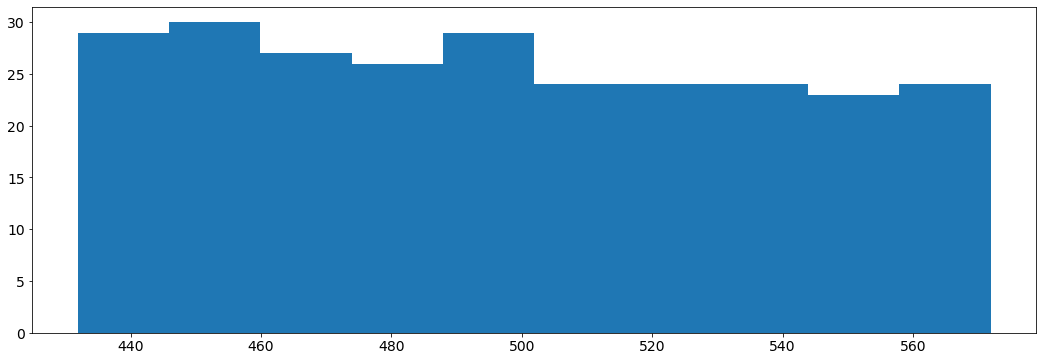

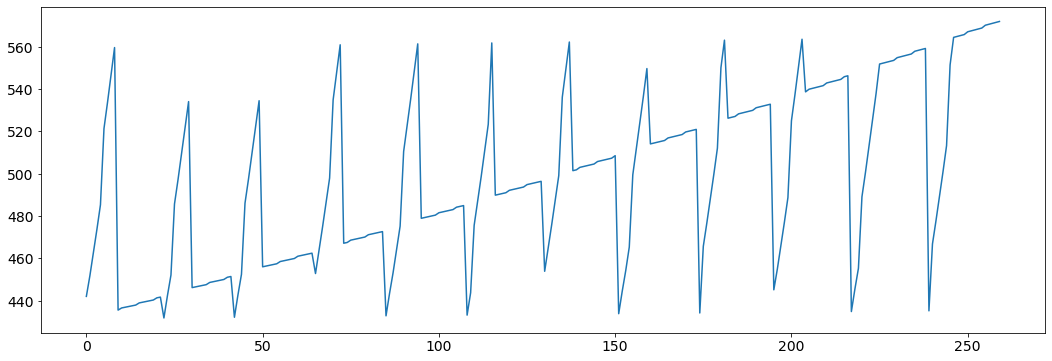

In [165]:
X = df_2023_predictions['PredClose']
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print(f"Mean1 = {mean1} \n Mean2 = {mean2} \n")
print(f"Variance1 = {var1} \n Variance2 = {var2} \n\n\n")
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(18, 6))
ax.hist(X)
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X)